In [2]:
import pandas as pd

# 读取原始 CSV 文件
file_path = '/Users/luogan/Desktop/vidur_or/lmsys_chat_1m_dataset/output_trace/input<500_output<600.csv'
df = pd.read_csv(file_path)

# 随机选择 100,000 行，固定随机种子为42
sampled_df = df.sample(n=100000, random_state=42)

# 保存随机选择的数据到新的 CSV 文件
output_path = '/Users/luogan/Desktop/vidur_or/lmsys_chat_1m_dataset/trace_for_booking_limit/sample_1e6_input<500_output<600.csv'
sampled_df.to_csv(output_path, index=False)

print(f"长度是: {len(sampled_df)}")

长度是: 100000


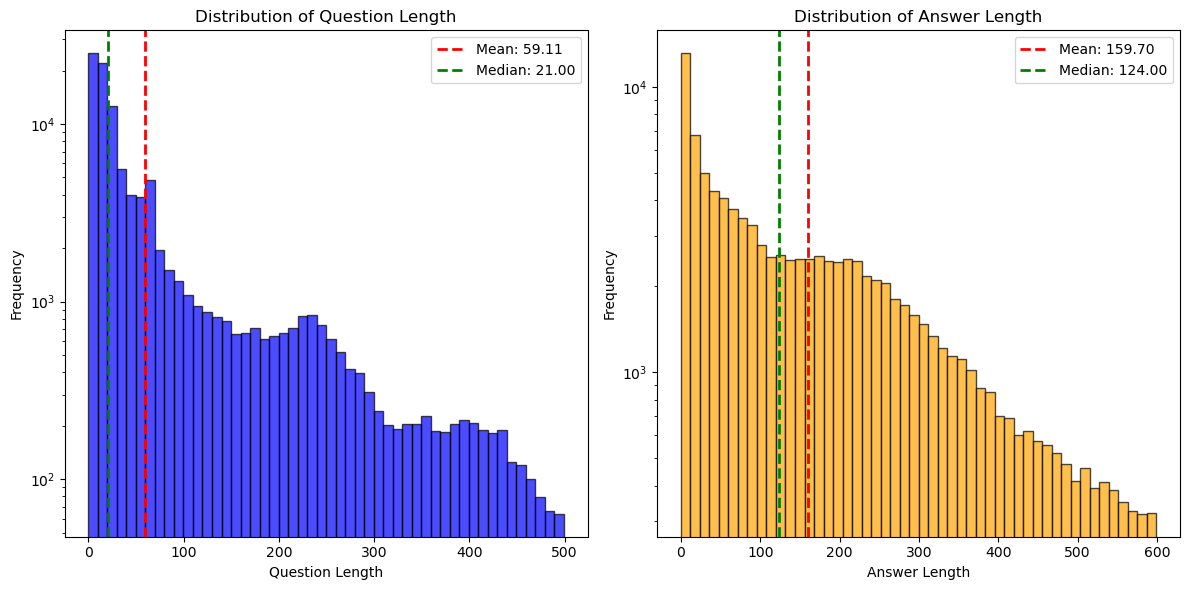

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
file_path = '/Users/luogan/Desktop/vidur_or/lmsys_chat_1m_dataset/trace_for_booking_limit/sample_1e6_input<500_output<600.csv'
df = pd.read_csv(file_path)

# 提取 question_length 和 answer_length
question_length = df['question_length']
answer_length = df['answer_length']

# 绘制 question_length 和 answer_length 的柱状图
plt.figure(figsize=(12, 6))

# 设置子图，第一部分绘制 question_length 的柱状图
plt.subplot(1, 2, 1)
plt.hist(question_length, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Question Length')
plt.xlabel('Question Length')
plt.ylabel('Frequency')

# 标注 mean 和 median
mean_q = question_length.mean()
median_q = question_length.median()
plt.axvline(mean_q, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_q:.2f}')
plt.axvline(median_q, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_q:.2f}')
plt.legend()

# 对数坐标轴
plt.yscale('log')

# 第二部分绘制 answer_length 的柱状图
plt.subplot(1, 2, 2)
plt.hist(answer_length, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Answer Length')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')

# 标注 mean 和 median
mean_a = answer_length.mean()
median_a = answer_length.median()
plt.axvline(mean_a, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_a:.2f}')
plt.axvline(median_a, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_a:.2f}')
plt.legend()

# 对数坐标轴
plt.yscale('log')

# 显示图表
plt.tight_layout()
plt.show()

Group Counts:
question_length_group
(0, 50]       631337
(50, 100]     120733
(100, 150]     40969
(150, 200]     30336
(200, 250]     34280
(250, 300]     20106
(300, 350]      9763
(350, 400]      9295
(400, 450]      7782
(450, 500]      3775
Name: count, dtype: int64

Answer Length Means per Group:
question_length_group
(0, 50]       156.358576
(50, 100]     171.146696
(100, 150]    167.758671
(150, 200]    157.294436
(200, 250]    138.437894
(250, 300]    159.605391
(300, 350]    183.624603
(350, 400]    182.626466
(400, 450]    196.545104
(450, 500]    229.564768
Name: answer_length, dtype: float64


/var/folders/1m/8g05bgls5xbf421lv3q0dk_00000gn/T/ipykernel_20937/1790323362.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  answer_length_means = df.groupby('question_length_group')['answer_length'].mean()


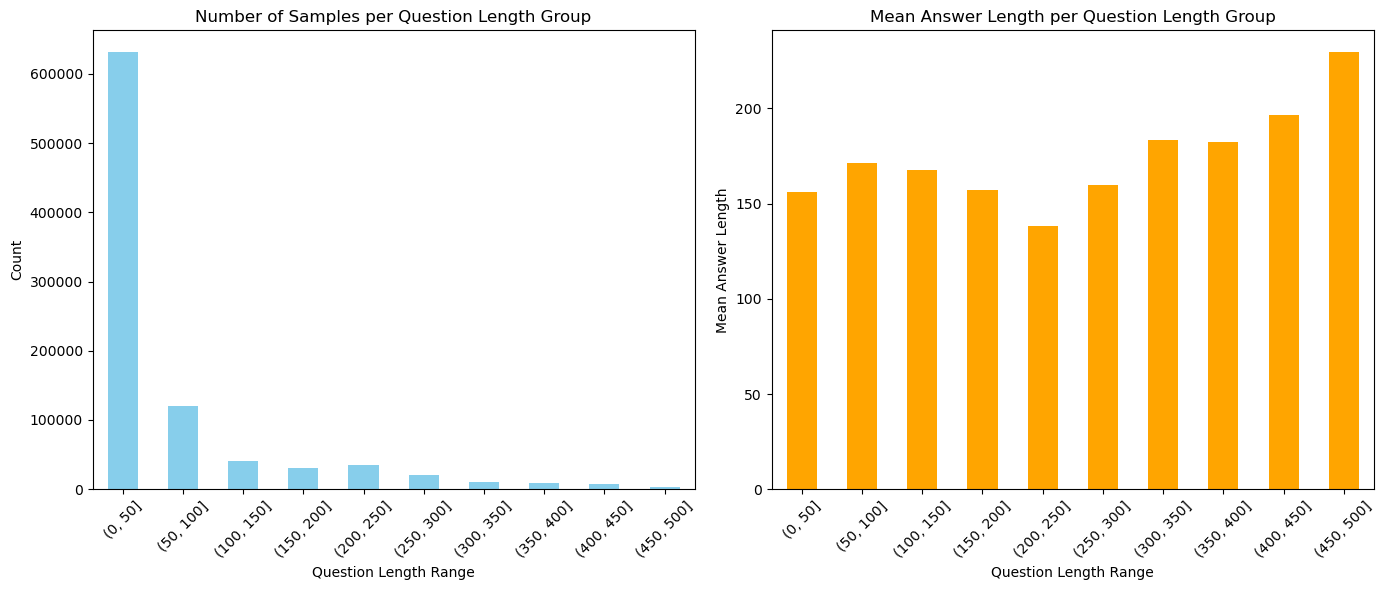

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
file_path = '/Users/luogan/Desktop/vidur_or/lmsys_chat_1m_dataset/output_trace/input<500_output<600.csv'
df = pd.read_csv(file_path)

# 设置分组间隔
interval = 50  # 你可以根据需要调整此值

# 对 'question_length' 列进行分组
bins = range(0, df['question_length'].max() + interval, interval)
df['question_length_group'] = pd.cut(df['question_length'], bins=bins)

# 计算每个组的数量
group_counts = df['question_length_group'].value_counts().sort_index()

# 计算每个组内 'answer_length' 的均值
answer_length_means = df.groupby('question_length_group')['answer_length'].mean()

# 打印每个组的数量和均值
print("Group Counts:")
print(group_counts)
print("\nAnswer Length Means per Group:")
print(answer_length_means)

# 可选：绘制柱状图
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 绘制每个组的数量
group_counts.plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_title('Number of Samples per Question Length Group')
ax[0].set_xlabel('Question Length Range')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

# 绘制每个组内 answer_length 的均值
answer_length_means.plot(kind='bar', color='orange', ax=ax[1])
ax[1].set_title('Mean Answer Length per Question Length Group')
ax[1].set_xlabel('Question Length Range')
ax[1].set_ylabel('Mean Answer Length')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [10]:
print("Group Counts:")
print(group_counts/3775)
print("\nAnswer Length Means per Group:")
print(answer_length_means)

Group Counts:
question_length_group
(0, 50]       167.241589
(50, 100]      31.982252
(100, 150]     10.852715
(150, 200]      8.036026
(200, 250]      9.080795
(250, 300]      5.326093
(300, 350]      2.586225
(350, 400]      2.462252
(400, 450]      2.061457
(450, 500]      1.000000
Name: count, dtype: float64

Answer Length Means per Group:
question_length_group
(0, 50]       156.358576
(50, 100]     171.146696
(100, 150]    167.758671
(150, 200]    157.294436
(200, 250]    138.437894
(250, 300]    159.605391
(300, 350]    183.624603
(350, 400]    182.626466
(400, 450]    196.545104
(450, 500]    229.564768
Name: answer_length, dtype: float64
